# Liver vs Cervical Cancer

## 1) Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('lung', delimiter='\t')

In [2]:
# df.copy()
df.head()
#df.iloc[:,0]
# df["sample	Chrom	Start	End	value"]

,sample,TCGA-NJ-A4YP-01,TCGA-18-3417-01,TCGA-22-4613-01,TCGA-90-7769-01,TCGA-62-8397-01,TCGA-77-A5G1-01,TCGA-86-8278-01,TCGA-77-A5G3-01,TCGA-05-4430-01,...,TCGA-63-A5MY-01,TCGA-50-6593-01,TCGA-33-AASL-01,TCGA-85-A512-01,TCGA-85-8354-01,TCGA-O2-A5IB-01,TCGA-67-3771-01,TCGA-77-7335-01,TCGA-55-8302-01,TCGA-56-7731-11
0,ARHGEF10L,-0.213692,-2.032992,-1.109192,-1.270392,0.677108,0.054708,0.361908,-1.344192,-0.497692,...,-1.335292,0.571208,-0.762292,-1.286992,-1.847792,0.568508,-0.521492,-0.849892,0.305608,-0.888992
1,HIF3A,-2.780026,-0.775126,-1.023426,-3.254826,1.092974,0.075174,-0.596926,0.826174,-0.146426,...,4.021874,2.958374,-0.831926,-1.863426,-1.297326,0.025974,5.729974,-2.414126,-0.018326,4.229474
2,RNF17,-0.531035,0.573765,-0.531035,-0.090835,-0.531035,-0.531035,-0.198435,-0.531035,-0.531035,...,1.554065,-0.531035,0.984465,-0.531035,-0.531035,0.084865,0.192765,0.192865,-0.531035,-0.531035
3,RNF10,0.040728,0.365228,-0.326772,0.160728,0.583528,-0.147472,-0.575072,-0.364672,-0.300072,...,-0.292972,-0.221772,-0.651572,0.020328,-0.280072,-0.009372,-0.279272,0.197228,0.003728,0.162228
4,RNF11,-0.699378,0.364522,0.308122,0.368322,0.314922,0.826222,-0.783778,-0.312978,0.296422,...,0.479122,-0.067178,-0.446678,-0.560978,-0.560278,-0.136278,0.486522,0.443922,-0.451578,0.344522


In [3]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-NJ-A4YP-01,-0.213692,-2.78003,-0.531035,0.040728,-0.699378,-0.42951,-0.384894,0.702354,-0.423399,2.88833,...,0.0685217,-1.58712,0.931767,-0.46399,-0.00267684,0.745714,1.46177,-0.426195,-0.645033,0.400188
TCGA-18-3417-01,-2.03299,-0.775126,0.573765,0.365228,0.364522,0.31389,-0.245994,0.0162543,-0.423399,-1.11657,...,-0.748878,-1.58712,0.304967,2.60701,1.30262,1.02501,-0.381027,0.839305,-1.08503,0.533188
TCGA-22-4613-01,-1.10919,-1.02343,-0.531035,-0.326772,0.308122,1.19219,-0.814294,-0.618246,1.0464,-2.14307,...,-0.748878,-1.58712,0.779667,1.15821,0.124023,-0.396686,-0.781327,-0.732495,1.73387,0.624488
TCGA-90-7769-01,-1.27039,-3.25483,-0.090835,0.160728,0.368322,-0.52621,0.506406,-1.37095,0.0168006,-3.83017,...,0.0280217,-1.58712,-2.52823,2.07981,-0.431477,0.0947142,-2.26783,-1.13709,-1.21023,0.153688


In [4]:
# df =df2
df.shape

(1130, 20530)

In [5]:
# df.dtypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, sample to TCGA-56-7731-11
Columns: 20530 entries, 0 to 20529
dtypes: object(20530)
memory usage: 177.0+ MB


In [7]:
#Making each column of the dataset have the same number of rows (deleting not a number values and duplicates)

# Alternatively clean = df.dropna()
# df.dropna(inplace=True)
# df.head()
# df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
df = df.fillna(0)

In [8]:
# Checking dataset properties after having cleaned the original version

df.shape

(1130, 20530)

In [9]:
# Checking for duplicates

# df.duplicated()

In [10]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-NJ-A4YP-01,-0.213692,-2.78003,-0.531035,0.040728,-0.699378,-0.42951,-0.384894,0.702354,-0.423399,2.88833,...,0.0685217,-1.58712,0.931767,-0.46399,-0.00267684,0.745714,1.46177,-0.426195,-0.645033,0.400188
TCGA-18-3417-01,-2.03299,-0.775126,0.573765,0.365228,0.364522,0.31389,-0.245994,0.0162543,-0.423399,-1.11657,...,-0.748878,-1.58712,0.304967,2.60701,1.30262,1.02501,-0.381027,0.839305,-1.08503,0.533188
TCGA-22-4613-01,-1.10919,-1.02343,-0.531035,-0.326772,0.308122,1.19219,-0.814294,-0.618246,1.0464,-2.14307,...,-0.748878,-1.58712,0.779667,1.15821,0.124023,-0.396686,-0.781327,-0.732495,1.73387,0.624488
TCGA-90-7769-01,-1.27039,-3.25483,-0.090835,0.160728,0.368322,-0.52621,0.506406,-1.37095,0.0168006,-3.83017,...,0.0280217,-1.58712,-2.52823,2.07981,-0.431477,0.0947142,-2.26783,-1.13709,-1.21023,0.153688
TCGA-62-8397-01,0.677108,1.09297,-0.531035,0.583528,0.314922,-0.66211,0.0261055,-1.48875,-0.423399,1.38193,...,-0.748878,-1.58712,0.913367,0.0172102,-0.338677,-0.00518579,-0.735227,0.204105,1.33657,-0.598212


In [11]:
df2 = pd.read_csv('cervical', delimiter='\t')
df2.head()

,sample,TCGA-EA-A3HT-01,TCGA-FU-A3HZ-01,TCGA-FU-A3TQ-01,TCGA-DS-A0VK-01,TCGA-UC-A7PG-01,TCGA-C5-A7UE-01,TCGA-C5-A1MJ-01,TCGA-UC-A7PI-01,TCGA-C5-A1MF-01,...,TCGA-JW-A5VI-01,TCGA-VS-A9UD-01,TCGA-C5-A1BQ-01,TCGA-MU-A8JM-01,TCGA-DS-A0VM-01,TCGA-MY-A5BF-01,TCGA-EA-A556-01,TCGA-IR-A3LA-01,TCGA-VS-AA62-01,TCGA-ZJ-AAXB-01
0,ARHGEF10L,0.664808,-0.870192,1.278708,-0.210892,0.920108,-0.716092,0.054008,1.438008,-0.102892,...,-0.108292,-0.458392,-0.413892,-1.007792,-0.549292,-0.255692,-1.172392,-0.146792,-1.306892,-0.492192
1,HIF3A,-3.218726,-2.502826,-2.714626,-0.763726,-0.467326,-4.477926,-0.463926,-1.472326,1.105974,...,-3.011226,-2.142026,-2.121626,-4.116626,-3.194026,-4.054026,4.398574,-2.194926,-3.093226,0.063174
2,RNF17,0.577865,-0.531035,1.847665,2.327065,0.032765,-0.531035,-0.531035,-0.531035,1.457465,...,-0.531035,0.930665,-0.123235,1.745865,1.218965,0.406265,-0.531035,-0.531035,0.054765,-0.531035
3,RNF10,-0.187472,-0.057972,-0.071672,-0.142172,0.148928,-0.214172,-0.073972,-0.196072,-0.199772,...,-0.471072,-0.269972,0.048828,0.292028,-0.252872,-0.067372,0.193628,-0.223072,-0.040772,0.230928
4,RNF11,0.552722,-0.123378,1.481922,0.176122,0.509522,0.367822,-0.677078,-0.947978,-1.280178,...,0.503822,-0.587878,0.283922,0.592722,-1.018078,0.971822,0.041822,0.012922,-0.434478,-0.072878


In [12]:
df2 = df2.T
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-EA-A3HT-01,0.664808,-3.21873,0.577865,-0.187472,0.552722,0.18549,-0.421494,0.612254,-0.423399,-3.14687,...,0.360022,-1.58712,0.371567,0.17021,0.00752316,0.640014,-0.686627,-1.18589,-2.16733,-0.0564124
TCGA-FU-A3HZ-01,-0.870192,-2.50283,-0.531035,-0.057972,-0.123378,-1.13101,-0.133094,-1.66605,-0.423399,-4.22187,...,-0.748878,-0.163317,0.00546654,1.44321,-0.488077,-1.78159,-2.01723,-0.997295,-2.20713,0.363988
TCGA-FU-A3TQ-01,1.27871,-2.71463,1.84766,-0.071672,1.48192,-0.61691,-0.206094,-0.131546,-0.423399,-3.88497,...,-0.748878,-1.58712,0.516467,2.72951,0.415323,-0.898386,-1.28653,-0.252695,0.967167,-0.204112
TCGA-DS-A0VK-01,-0.210892,-0.763726,2.32706,-0.142172,0.176122,0.44099,0.0884055,-1.22495,-0.112599,-0.761472,...,-0.748878,-1.58712,-0.398533,-1.28139,-0.644377,-0.134986,0.938473,0.0386054,1.47367,-0.0479124


In [13]:
# df2.duplicated()

In [14]:
# df2.dropna(inplace=True)
df2 = df2.fillna(0)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, sample to TCGA-ZJ-AAXB-01
Columns: 20530 entries, 0 to 20529
dtypes: object(20530)
memory usage: 48.4+ MB


In [16]:
df2.shape

(309, 20530)

In [17]:
new_header = df2.iloc[0] #grab the first row for the header
df2 = df2[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header
df2.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-EA-A3HT-01,0.664808,-3.21873,0.577865,-0.187472,0.552722,0.18549,-0.421494,0.612254,-0.423399,-3.14687,...,0.360022,-1.58712,0.371567,0.17021,0.00752316,0.640014,-0.686627,-1.18589,-2.16733,-0.0564124
TCGA-FU-A3HZ-01,-0.870192,-2.50283,-0.531035,-0.057972,-0.123378,-1.13101,-0.133094,-1.66605,-0.423399,-4.22187,...,-0.748878,-0.163317,0.00546654,1.44321,-0.488077,-1.78159,-2.01723,-0.997295,-2.20713,0.363988
TCGA-FU-A3TQ-01,1.27871,-2.71463,1.84766,-0.071672,1.48192,-0.61691,-0.206094,-0.131546,-0.423399,-3.88497,...,-0.748878,-1.58712,0.516467,2.72951,0.415323,-0.898386,-1.28653,-0.252695,0.967167,-0.204112
TCGA-DS-A0VK-01,-0.210892,-0.763726,2.32706,-0.142172,0.176122,0.44099,0.0884055,-1.22495,-0.112599,-0.761472,...,-0.748878,-1.58712,-0.398533,-1.28139,-0.644377,-0.134986,0.938473,0.0386054,1.47367,-0.0479124
TCGA-UC-A7PG-01,0.920108,-0.467326,0.032765,0.148928,0.509522,-0.80371,-0.102094,-0.368446,-0.423399,-2.66097,...,-0.748878,-1.02332,-0.534733,0.00231018,0.0146232,0.353414,-1.13573,0.0280054,-0.943233,-0.0553124


In [18]:
liver = np.zeros(1129)
cervical = np.ones(308)

lab = np.append(liver,cervical)

# typlab = np.array(typlab)

print(lab)
print(lab.shape)

[0. 0. 0. ... 1. 1. 1.]
(1437L,)


In [19]:
# df3 = pd.merge(df, df2)
# df3.head()

In [20]:
# import pickle
# with open('df.pickle', 'wb') as f:
#     pickle.dump(df, f)
    
# import pickle
# with open('df2.pickle', 'wb') as f:
#     pickle.dump(df2, f)

In [21]:
df3 = df.append(df2)
df3.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-NJ-A4YP-01,-0.213692,-2.78003,-0.531035,0.040728,-0.699378,-0.42951,-0.384894,0.702354,-0.423399,2.88833,...,0.0685217,-1.58712,0.931767,-0.46399,-0.00267684,0.745714,1.46177,-0.426195,-0.645033,0.400188
TCGA-18-3417-01,-2.03299,-0.775126,0.573765,0.365228,0.364522,0.31389,-0.245994,0.0162543,-0.423399,-1.11657,...,-0.748878,-1.58712,0.304967,2.60701,1.30262,1.02501,-0.381027,0.839305,-1.08503,0.533188
TCGA-22-4613-01,-1.10919,-1.02343,-0.531035,-0.326772,0.308122,1.19219,-0.814294,-0.618246,1.0464,-2.14307,...,-0.748878,-1.58712,0.779667,1.15821,0.124023,-0.396686,-0.781327,-0.732495,1.73387,0.624488
TCGA-90-7769-01,-1.27039,-3.25483,-0.090835,0.160728,0.368322,-0.52621,0.506406,-1.37095,0.0168006,-3.83017,...,0.0280217,-1.58712,-2.52823,2.07981,-0.431477,0.0947142,-2.26783,-1.13709,-1.21023,0.153688
TCGA-62-8397-01,0.677108,1.09297,-0.531035,0.583528,0.314922,-0.66211,0.0261055,-1.48875,-0.423399,1.38193,...,-0.748878,-1.58712,0.913367,0.0172102,-0.338677,-0.00518579,-0.735227,0.204105,1.33657,-0.598212


In [22]:
# df2.shape
df3['Label'] = lab
df3.head()

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Label
TCGA-NJ-A4YP-01,-0.213692,-2.78003,-0.531035,0.040728,-0.699378,-0.42951,-0.384894,0.702354,-0.423399,2.88833,...,-1.58712,0.931767,-0.46399,-0.00267684,0.745714,1.46177,-0.426195,-0.645033,0.400188,0.0
TCGA-18-3417-01,-2.03299,-0.775126,0.573765,0.365228,0.364522,0.31389,-0.245994,0.0162543,-0.423399,-1.11657,...,-1.58712,0.304967,2.60701,1.30262,1.02501,-0.381027,0.839305,-1.08503,0.533188,0.0
TCGA-22-4613-01,-1.10919,-1.02343,-0.531035,-0.326772,0.308122,1.19219,-0.814294,-0.618246,1.0464,-2.14307,...,-1.58712,0.779667,1.15821,0.124023,-0.396686,-0.781327,-0.732495,1.73387,0.624488,0.0
TCGA-90-7769-01,-1.27039,-3.25483,-0.090835,0.160728,0.368322,-0.52621,0.506406,-1.37095,0.0168006,-3.83017,...,-1.58712,-2.52823,2.07981,-0.431477,0.0947142,-2.26783,-1.13709,-1.21023,0.153688,0.0
TCGA-62-8397-01,0.677108,1.09297,-0.531035,0.583528,0.314922,-0.66211,0.0261055,-1.48875,-0.423399,1.38193,...,-1.58712,0.913367,0.0172102,-0.338677,-0.00518579,-0.735227,0.204105,1.33657,-0.598212,0.0


In [23]:
# typasd = pd.DataFrame(data=d)
# df3 = pd.merge(df, df2)

export_csv = df3.to_csv ('Cancer2.csv', index = None, header=True)
%store df3

# pickle.dump(df3, r'C:\Users\hp\Desktop\FinalData.pier')
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump(df3, f)
    
# To then load the variable
# with open('data.pickle', 'rb') as f:
#     df3 = pickle.load(f)

print(df3.head())

print(df3.shape)

Stored 'df3' (DataFrame)
sample          ARHGEF10L     HIF3A     RNF17     RNF10     RNF11    RNF13  \
TCGA-NJ-A4YP-01 -0.213692  -2.78003 -0.531035  0.040728 -0.699378 -0.42951   
TCGA-18-3417-01  -2.03299 -0.775126  0.573765  0.365228  0.364522  0.31389   
TCGA-22-4613-01  -1.10919  -1.02343 -0.531035 -0.326772  0.308122  1.19219   
TCGA-90-7769-01  -1.27039  -3.25483 -0.090835  0.160728  0.368322 -0.52621   
TCGA-62-8397-01  0.677108   1.09297 -0.531035  0.583528  0.314922 -0.66211   

sample             GTF2IP1       REM1      MTVR2  RTN4RL2  ...     NPY5R  \
TCGA-NJ-A4YP-01  -0.384894   0.702354  -0.423399  2.88833  ...  -1.58712   
TCGA-18-3417-01  -0.245994  0.0162543  -0.423399 -1.11657  ...  -1.58712   
TCGA-22-4613-01  -0.814294  -0.618246     1.0464 -2.14307  ...  -1.58712   
TCGA-90-7769-01   0.506406   -1.37095  0.0168006 -3.83017  ...  -1.58712   
TCGA-62-8397-01  0.0261055   -1.48875  -0.423399  1.38193  ...  -1.58712   

sample              GNGT2      GNGT1       TULP3 

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df3.drop(['Label'], axis = 1).values
Y = df3['Label']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

C:\Apps\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Apps\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 2) Correlation Analysis

In [26]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

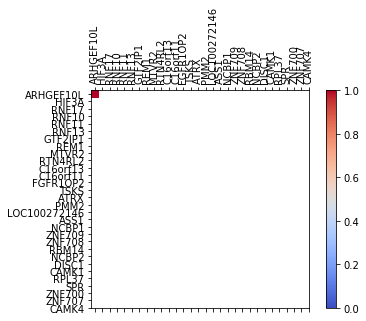

In [47]:
data = df3
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns[0:30]),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns[0:30])
ax.set_yticklabels(data.columns[0:30])
plt.show()

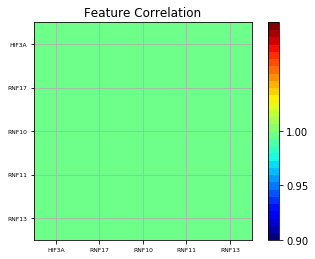

In [48]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    ax1.set_xticklabels(data.columns[0:30],fontsize=6)
    ax1.set_yticklabels(data.columns[0:30],fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df3)

In [52]:
rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(20, 20))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

sample,Label
sample,
Label,1


C:\Apps\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

Error in callback <function post_execute at 0x000000000BDAEF28> (for post_execute):


ValueError: Image size of 3695580x3695580 pixels is too large. It must be less than 2^16 in each direction.

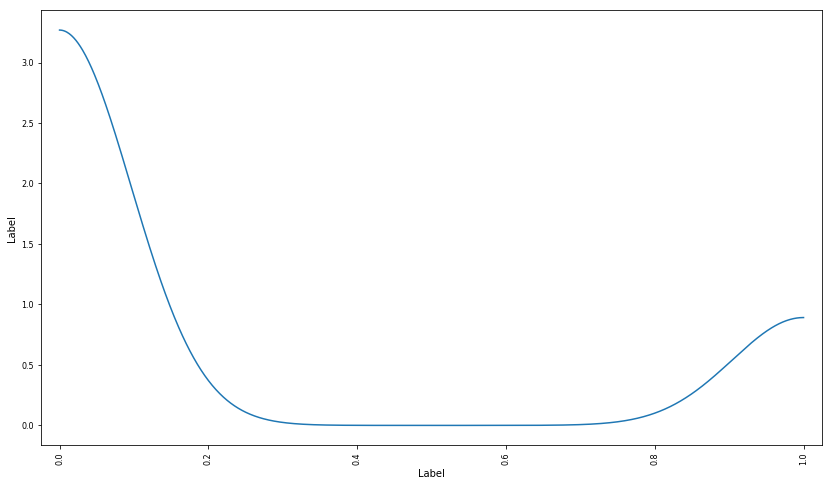

ValueError: Image size of 3695580x3695580 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3.69558e+06x3.69558e+06 with 4840 Axes>

In [53]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(data)

import matplotlib.pyplot as pl
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## 3) ML Classification

### Logistic Regression

In [27]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[349   3]
 [  1  79]]
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       352
        1.0       0.96      0.99      0.98        80

avg / total       0.99      0.99      0.99       432



### Random Forest

In [28]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[351   1]
 [  2  78]]
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       352
        1.0       0.99      0.97      0.98        80

avg / total       0.99      0.99      0.99       432



### Support Vector Machine

In [29]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[349   3]
 [  1  79]]
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       352
        1.0       0.96      0.99      0.98        80

avg / total       0.99      0.99      0.99       432



### Decision Trees

In [30]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))
# predictionstree = trainedtree.predict_proba(X_Test)
# print(predictionstree)

[[349   3]
 [  6  74]]
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99       352
        1.0       0.96      0.93      0.94        80

avg / total       0.98      0.98      0.98       432



In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus
dot_data = StringIO()
export_graphviz(trainedtree, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

### Linear Disciminant Analysis

In [37]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

C:\Apps\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[345   7]
 [ 46  34]]
             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93       352
        1.0       0.83      0.42      0.56        80

avg / total       0.87      0.88      0.86       432



### Naive Bayes Classifier

In [39]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[343   9]
 [ 28  52]]
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95       352
        1.0       0.85      0.65      0.74        80

avg / total       0.91      0.91      0.91       432



### Plot taking just first 2 features

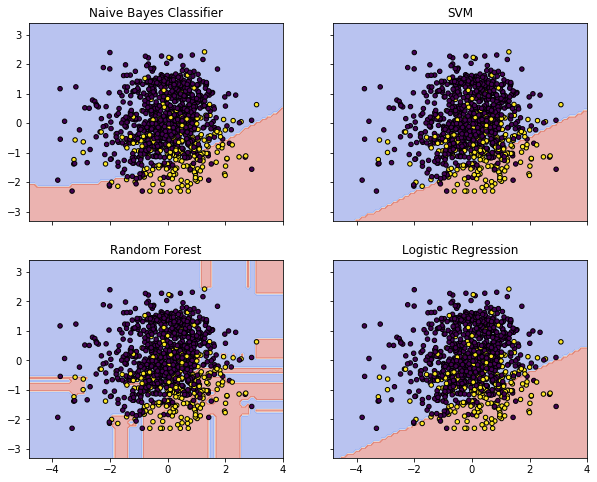

In [40]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# Plotting decision regions

reduced_data = X_Train[:, :2]

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)


x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Evaluating PCA Data Performance

In [41]:
# df = pd.read_csv('Toddler Autism dataset July 2018.csv', na_values='?')
# df.dropna(inplace=True)
# df.drop(['Case_No', 'Who completed the test', 'Qchat-10-Score'], axis = 1, inplace = True)
# # df.head()

# columns = ['Ethnicity', 'Family_mem_with_ASD', 'Sex','Class/ASD Traits ', 'Jaundice']
# for col in columns:
#     df[col] = LabelEncoder().fit_transform(df[col])
# df.dtypes

# X = df.drop(['Class/ASD Traits '], axis = 1)
# Y = df['Class/ASD Traits ']

# X = StandardScaler().fit_transform(X) # Standardizing data

pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

# pca = PCA(n_components=2,svd_solver='full')
# X_reduced = pca.fit_transform(X_Train)
#X_reduced = TSNE(n_components=2).fit_transform(X_Train, Y_Train)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

# pca = PCA(n_components=2,svd_solver='full')
# X_test_reduced = pca.fit_transform(X_Test)
#X_test_reduced = TSNE(n_components=2).fit_transform(X_Test, Y_Test)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

Naive Bayes
[[336  16]
 [ 30  50]]
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94       352
        1.0       0.76      0.62      0.68        80

avg / total       0.89      0.89      0.89       432

SVM
[[311  41]
 [ 23  57]]
             precision    recall  f1-score   support

        0.0       0.93      0.88      0.91       352
        1.0       0.58      0.71      0.64        80

avg / total       0.87      0.85      0.86       432

Random Forest
[[325  27]
 [ 23  57]]
             precision    recall  f1-score   support

        0.0       0.93      0.92      0.93       352
        1.0       0.68      0.71      0.70        80

avg / total       0.89      0.88      0.89       432

Logistic Regression
[[327  25]
 [ 25  55]]
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93       352
        1.0       0.69      0.69      0.69        80

avg / total       0.88      0.88      0.88       432

### Plotting PCA data classification

KeyboardInterrupt: 

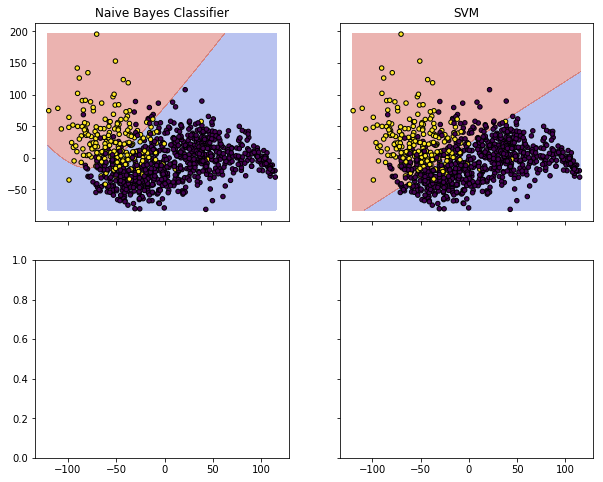

In [42]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# Plotting decision regions

reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)


x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()